In [1]:
import torch
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import ml_collections
import numpy as np

from data import MNISTDataset
from torch.utils.data import DataLoader
from model import SetFlowModule
from config import create_config
from flow_matching.path.scheduler import CondOTScheduler
from flow_matching.path import AffineProbPath
from flow_matching.solver import Solver, ODESolver

In [68]:
ckpt_path = "weights/20250404-173904/checkpoint-epoch=01.ckpt"

with open(os.path.join(
        os.path.join(os.path.join(*ckpt_path.split("/")[:2])), "config.json"), 
        "r"
    ) as f:
        config_dict = json.load(f)
config = ml_collections.ConfigDict(config_dict)

model = SetFlowModule.load_from_checkpoint(
    config=config,
    checkpoint_path=ckpt_path
).to("cuda:0")

In [11]:
out = model.model.sample(500, device="cuda:")

In [6]:
dataset = MNISTDataset()
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
sample = next(iter(dataloader))
sample = sample.to("cuda:9")

# out = model.reconstruct(
#     sample, 
#     batch_size=sample.shape[1],
#     timesteps=10
# )

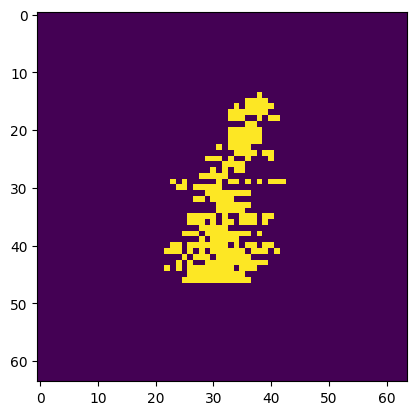

In [81]:
out = model.model.sample(500, device="cuda:0")
coords = out[0].detach().cpu().numpy()
coords *= 63

image = np.zeros((64, 64), dtype=np.float32)
for (y, x) in coords.astype(int):
    if 0 <= y < 64 and 0 <= x < 64:
        image[y, x] = 1.0
        
plt.imshow(image)

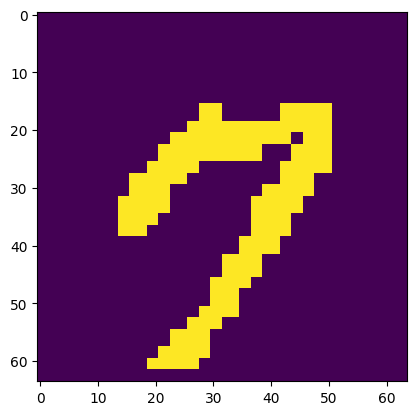

In [7]:
coords = sample[0].detach().cpu().numpy()
coords *= 63

image = np.zeros((64, 64), dtype=np.float32)
for (y, x) in coords.astype(int):
    if 0 <= y < 64 and 0 <= x < 64:
        image[y, x] = 1.0
        
plt.imshow(image)

TypeError: 'Axes' object is not subscriptable

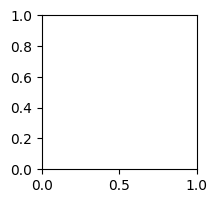

In [8]:
num_timesteps = out.shape[0]
timesteps_to_plot = list(range(0, num_timesteps, 1))
num_plots = len(timesteps_to_plot)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(2 * num_plots, 2))

for idx, t in enumerate(timesteps_to_plot):
    coords = out[t].detach().cpu().numpy()
    coords *= 27

    image = np.zeros((28, 28), dtype=np.float32)
    for (y, x) in coords.astype(int):
        if 0 <= y < 28 and 0 <= x < 28:
            image[y, x] = 1.0

    axes[idx].imshow(image, cmap='gray')
    axes[idx].set_title(f"Timestep {t}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()
